# SMS SPAM DETECTION

In [1]:
# Importing libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [2]:
#loading the dataset csv file
data = pd.read_csv("spam.csv")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#printing the information the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#sum of null values before data cleaning
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### Data Preprocessing

In [5]:
#removing the unwanted columns
data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [6]:
#null values after data cleaning
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
#printing the data after cleaning
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

Number of ham and spam messages in the dataset

<AxesSubplot:xlabel='v1', ylabel='count'>

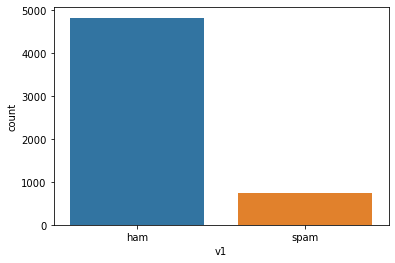

In [9]:
sns.countplot(x=data.v1)

We can see that our dataset contains mainly ham messages. This would limit the capability of model to classify correctly, but we can give it a try!

In [10]:
stemmer = SnowballStemmer("english")

def simplify_data(data):
    # Create new tables named "Spam" and "Text"
    # Convert ham/spam to 0/1, 1 indicating Spam and fill them under Spam
    # Clean text by removing all special characters
    # Drop unwanted columns
    
    data = pd.read_csv("spam.csv")          # Refreshing data, just in-case the code is ran after running further modules
    data["Spam"] = data.v1.map({'ham':0, 'spam':1})
    data["Text"] = data.v2.str.lower()
    data.Text = data.Text.str.replace(r'[.,\\&;!:-?(|)#@$^%*0-9/\'\"+={|}~`_[|]]*', '')
    data = data.drop(["v1", "v2", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
    return data
    
def remove_stopwords(message):
    # Remove stop words from the text
    
    stop_words = set(stopwords.words('english'))
    message = message.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in message.split() if word not in stop_words and len(word) > 2]
    return " ".join(text)

def text_length(text):
    return len(text)
    
def format_length(data):
    data["Length"] = data.Text.apply(text_length)
    data.Length = pd.cut(data.Length, [-1, 10, 20, 30, 50, 75, 100, 999], labels=[10,20,30,50,75,100,200])
    return data
    
def apply_transformations(data):
    data = simplify_data(data)
    data.Text = data.Text.apply(remove_stopwords)
    data = format_length(data)
    return data

data = apply_transformations(data)
data.head()

<ipython-input-10-db402d0bc893>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  data.Text = data.Text.str.replace(r'[.,\\&;!:-?(|)#@$^%*0-9/\'\"+={|}~`_[|]]*', '')


,Spam,Text,Length
0,0,jurong point crazy available bugis great world...,75
1,0,lar joking wif oni,20
2,1,free entry wkly comp win cup final tkts may te...,100
3,0,dun say early hor already say,30
4,0,nah dont think goes usf lives around though,50


<AxesSubplot:xlabel='Length', ylabel='count'>

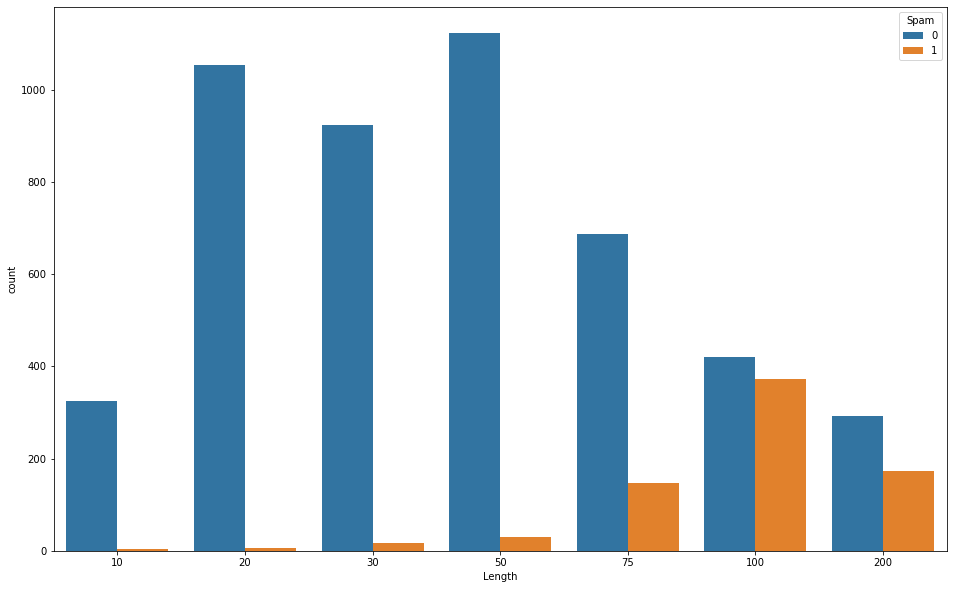

In [11]:
plt.figure(figsize=(16,10))
plt.xlabel("Length")
plt.ylabel("Number of Spam messages")
sns.countplot(x=data.Length, hue=data.Spam)

We can see that most messages with less length were mostly Ham messages and that the spam messages have a comparatively very small area. We can use this data further for classification. We also binned the lengths due to the broad spread it had previously.

In [12]:
# For the first model, we will try to create a feature of our own
# We can calculate number of spam words and the number of ham words
# These numbers can be compared to make out whether a message has
# more ham features or more spam features

# Calculating the number of Spam/Ham words in a message and Storing
# the diff Spam-Ham(0 if Ham>Spam, 1 if Spam>Ham))


# Create a list of all words occuring in Spam/Ham
spam_words = []
ham_words = []

def getSpam(text):
    global spam_words, spam_messages
    messages = text.split()
    words = [x for x in messages]
    spam_words += words
    
def getHam(text):
    global ham_words, ham_messages
    messages = text.split()
    words = [x for x in messages]
    ham_words += words
    
# Separate spam and ham messages
spam_messages = data[data["Spam"] == 1]["Text"]
ham_messages = data[data["Spam"] == 0]["Text"]

# Store common words in Spam/Ham
spam_messages.apply(getSpam)
ham_messages.apply(getHam)


def countSpam(text):
    count = 0
    for x in text.split():
        if x in spam_words:
            count += spam_words.count(x)
    return count

def countHam(text):
    count = 0
    for x in text.split():
        if x in ham_words:
            count += ham_words.count(x)
    return count

def getCounts(data):
    SpamCount = data.Text.apply(countSpam)
    HamCount = data.Text.apply(countHam)
    data["Diff"] = SpamCount - HamCount
    return data

def categorize(diff):
    if diff <= 0:
        return 0
    else:
        return 1

def apply_calc(data):
    data = getCounts(data)
    data.Diff = data.Diff.apply(categorize)
    return data

data = apply_calc(data)


In [13]:
data.head()

,Spam,Text,Length,Diff
0,0,jurong point crazy available bugis great world...,75,0
1,0,lar joking wif oni,20,0
2,1,free entry wkly comp win cup final tkts may te...,100,1
3,0,dun say early hor already say,30,0
4,0,nah dont think goes usf lives around though,50,0


In [14]:
spam_words.count("free")

219

In [15]:
ham_words.count("free")

59

Now that we've the algorithm to generate the required data(diff), we can try our model.

### Spliting train and test data

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = data.drop(["Spam"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, data.Spam, test_size=0.2, random_state=0)

In [17]:
print(X_train)

                                                   Text Length  Diff
1114     nothis kallis home groundamla home town durban     50     0
3589         escape theatre going watch kavalan minutes     50     0
3095  walked moms right stagwood pass right winterst...    100     0
1012                              dunno close oredi fan     30     0
3320                                         right work     10     0
...                                                 ...    ...   ...
4931                            match startedindia ltgt     30     0
3264  want new nokia colour phone deliveredtomorrow ...    200     1
1653  bugis juz wat walking home oredi late reply os...     75     0
2607          yeah lol luckily didnt starring role like     50     0
2732      dare stupid wont tell anything hear wont talk     50     0

[4457 rows x 3 columns]


In [18]:
print(X_test)

                                                   Text Length  Diff
4456                      aight plan come later tonight     30     0
690                                           farm open     10     0
944   sent scores sophas secondary application schoo...    200     0
3768  see message leaving congrats dear school wat p...     50     0
1189                    case guess ill see campus lodge     50     0
...                                                 ...    ...   ...
2906                                             alrite     10     0
1270  sorry chikku cell got problem thts able reply msg     50     0
3944             gentle princess make sweet gentle love     50     0
2124  beautiful truth gravity read carefully heart f...    200     0
253   ups days also shipping company takes wks way u...    100     0

[1115 rows x 3 columns]


In [19]:
print(y_train)

1114    0
3589    0
3095    0
1012    0
3320    0
       ..
4931    0
3264    1
1653    0
2607    0
2732    0
Name: Spam, Length: 4457, dtype: int64


In [20]:
print(y_test)

4456    0
690     0
944     0
3768    0
1189    0
       ..
2906    0
1270    0
3944    0
2124    0
253     0
Name: Spam, Length: 1115, dtype: int64


Since we already have aur generated outputs in Diff column, we can now check the accuracy of the model on the training data

In [21]:
#accuracy of train and test data
from sklearn.metrics import accuracy_score, make_scorer
print("Accuracy on train data: ", accuracy_score(X_train.Diff, y_train))
print("Accuracy on test data: ", accuracy_score(X_test.Diff, y_test))

Accuracy on train data:  0.951312542068656
Accuracy on test data:  0.9461883408071748


A 94-95% accuracy sounds good for using only one parameter! However, we can further try using different models and try to include length as a parameter.

### Building Model

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [23]:
X_train = X_train[["Length", "Diff"]]
X_test = X_test[["Length", "Diff"]]

In [24]:
# RandomForestModel
# Trying different parameters and selecting the best one's to run
clf = RandomForestClassifier()
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }
acc_scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, cv=3)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_

clf.fit(X_train, y_train)

# Predicting the reuslts and calculating the accuracy

preds = clf.predict(X_test)

clf_acc = nb_acc = accuracy_score(y_test, preds)
print("Accuracy with RandomForestClassifier: ", accuracy_score(y_test, preds))

# SVC model
svc_clf = SVC(gamma='scale')
svc_clf.fit(X_train,y_train)
svc_preds = svc_clf.predict(X_test)

svc_acc = accuracy_score(y_test, svc_preds)
print("Accuracy with SVC: ", accuracy_score(y_test, svc_preds))

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

nb_acc = accuracy_score(y_test, nb_preds)
print("Accuracy with NaiveBayesian: ", accuracy_score(y_test, nb_preds))

Accuracy with RandomForestClassifier:  0.9524663677130045
Accuracy with SVC:  0.8511210762331839
Accuracy with NaiveBayesian:  0.9461883408071748


We got a great accuracy with all models, including the programming approach! Our models are proving to be really great in detecting spam messages!

<AxesSubplot:xlabel='Length', ylabel='count'>

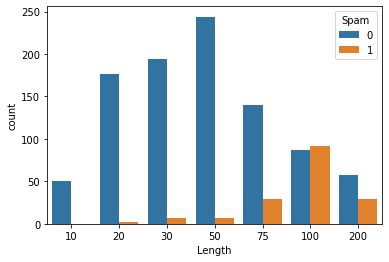

In [25]:
sns.countplot(x=X_test.Length, hue=y_test)

The model would be useless if we can't test custom inputs! Finally we create a function to interact with front-end for predicting spam category for manual input.


Since we had the most accuracy with RandomForestClassifier, we'll use it for our predictions.

In [26]:
#defining the c_report and confusion matrix functions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

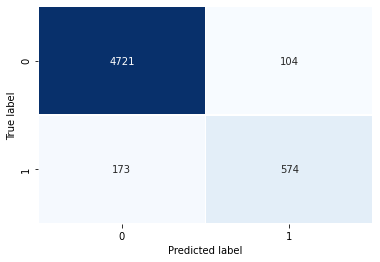

In [27]:
#confusion matrix between data.spam and data.diff
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(data.Spam, data.Diff)

#### To know the performance of the Random Forest Classifier

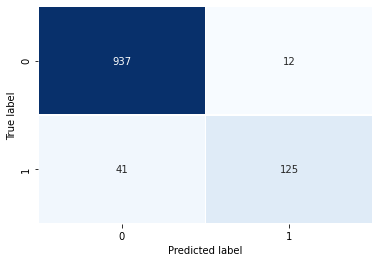

In [28]:
#confusion matrix between y_test and preds
plot_confusion_matrix(y_test, preds)

In [29]:
#printing the classification report
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       949
           1       0.91      0.75      0.83       166

    accuracy                           0.95      1115
   macro avg       0.94      0.87      0.90      1115
weighted avg       0.95      0.95      0.95      1115

Accuracy : 0.9524663677130045


0.9524663677130045

In [30]:
#printing the accuracy,precision,recall and F1-score of Random Forest Classifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
print(f"Accuracy: {round(accuracy_score(y_test, preds), 2)}") 
print(f"Precision: {round(precision_score(y_test, preds), 2)}")
print(f"Recall: {round(recall_score(y_test, preds), 2)}")
print(f"F1_score: {round(f1_score(y_test, preds), 2)}")

Accuracy: 0.95
Precision: 0.91
Recall: 0.75
F1_score: 0.83


### Output of the model

In [31]:
def manual_entry():
    global clf
    temp = pd.DataFrame(columns=["Text"])
    temp = temp.append({"Text": input("Enter message: ")}, ignore_index=True)

    temp = format_length(temp)
    temp = apply_calc(temp)
    temp = temp.drop(["Text"], axis=1)

    if temp.Diff.loc[0] == 1:
        print("Spam")
    else:
        print("Ham")
        
manual_entry()

Enter message: hi hello bye
Ham


In [32]:
def manual_entry():
    global clf
    temp = pd.DataFrame(columns=["Text"])
    temp = temp.append({"Text": input("Enter message: ")}, ignore_index=True)

    temp = format_length(temp)
    temp = apply_calc(temp)
    temp = temp.drop(["Text"], axis=1)

    if temp.Diff.loc[0] == 1:
        print("Spam")
    else:
        print("Ham")
        
manual_entry()

Enter message: SIX chances to win the cash!
Spam
